In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
colors = np.array(['blue','green','red','violet','cyan','magenta','yellow','black'])
marker_size = 75
marker_alpha = 0.50
directory = "../Data/3CentroidTest/"

In [33]:
df_points = pd.read_csv(directory+"3CentroidTest_Points.csv")
df_points = df_points.drop(['Unnamed: 0', 'index'], axis=1)
df_points.head()

,0,1,Index
0,-0.197217,8.255923,1
1,1.184272,7.080087,2
2,1.131134,8.758666,3
3,0.563816,9.643193,4
4,-0.234380,10.334680,5


In [34]:
df_1NORM_ASSIGNMENTS =  pd.read_csv(directory+"Assignment_1_NORM.csv")
df_1NORM_CENTROIDS =  pd.read_csv(directory+"Centroid_1_NORM.csv")

In [35]:
df_1NORM_ASSIGNMENTS = df_1NORM_ASSIGNMENTS.drop('Unnamed: 0',axis=1)
df_1NORM_CENTROIDS =df_1NORM_CENTROIDS.drop('Unnamed: 0',axis=1)

In [36]:
df_1NORM_CENTROIDS['iteration']=df_1NORM_CENTROIDS['iteration'].astype('int')
df_1NORM_CENTROIDS['index']= df_1NORM_CENTROIDS['index'].astype('int')

In [37]:
df_1NORM_CENTROIDS['color'] = colors[df_1NORM_CENTROIDS['index']]

In [38]:
df_INF_NORM_ASSIGNMENTS =  pd.read_csv(directory+"Assignment_INF_NORM.csv")
df_INF_CENTROIDS =  pd.read_csv(directory+"Centroid_INF_NORM.csv")

In [39]:
df_INF_NORM_ASSIGNMENTS = df_INF_NORM_ASSIGNMENTS.drop('Unnamed: 0',axis=1)
df_INF_CENTROIDS =df_INF_CENTROIDS.drop('Unnamed: 0',axis=1)

In [40]:
df_INF_CENTROIDS['iteration']=df_INF_CENTROIDS['iteration'].astype('int')
df_INF_CENTROIDS['index']= df_INF_CENTROIDS['index'].astype('int')

In [41]:
df_1NORM_MERGE = df_points.merge(df_1NORM_ASSIGNMENTS,left_on = ['Index'],right_on=['P_i'])
df_1NORM_MERGE.head()

,0,1,Index,iteration,P_i,C_j
0,-0.197217,8.255923,1,0,1,1
1,-0.197217,8.255923,1,1,1,2
2,-0.197217,8.255923,1,2,1,2
3,-0.197217,8.255923,1,3,1,2
4,-0.197217,8.255923,1,4,1,2


In [42]:
df_1NORM_MERGE['color'] = colors[df_1NORM_MERGE['C_j']]

In [43]:
df_INF_NORM_MERGE = df_points.merge(df_INF_NORM_ASSIGNMENTS,left_on = ['Index'],right_on=['P_i'])
df_INF_NORM_MERGE.head()

,0,1,Index,iteration,P_i,C_j
0,-0.197217,8.255923,1,0,1,1
1,-0.197217,8.255923,1,1,1,1
2,-0.197217,8.255923,1,2,1,1
3,-0.197217,8.255923,1,3,1,3
4,-0.197217,8.255923,1,4,1,3


In [44]:
df_INF_CENTROIDS['color'] = colors[df_INF_CENTROIDS['index']]
df_INF_CENTROIDS.head()

,iteration,index,x_1,x_2,color
0,0,1,-4.352713,6.626055,green
1,0,2,-4.925280,5.869827,red
2,0,3,-4.355812,7.134931,violet
3,1,1,-4.352713,6.626055,green
4,1,2,-4.925280,5.869827,red


In [45]:
df_INF_NORM_MERGE['color'] = colors[df_INF_NORM_MERGE['C_j']]
df_INF_NORM_MERGE.head()

,0,1,Index,iteration,P_i,C_j,color
0,-0.197217,8.255923,1,0,1,1,green
1,-0.197217,8.255923,1,1,1,1,green
2,-0.197217,8.255923,1,2,1,1,green
3,-0.197217,8.255923,1,3,1,3,violet
4,-0.197217,8.255923,1,4,1,3,violet


# 1 Norm Plots

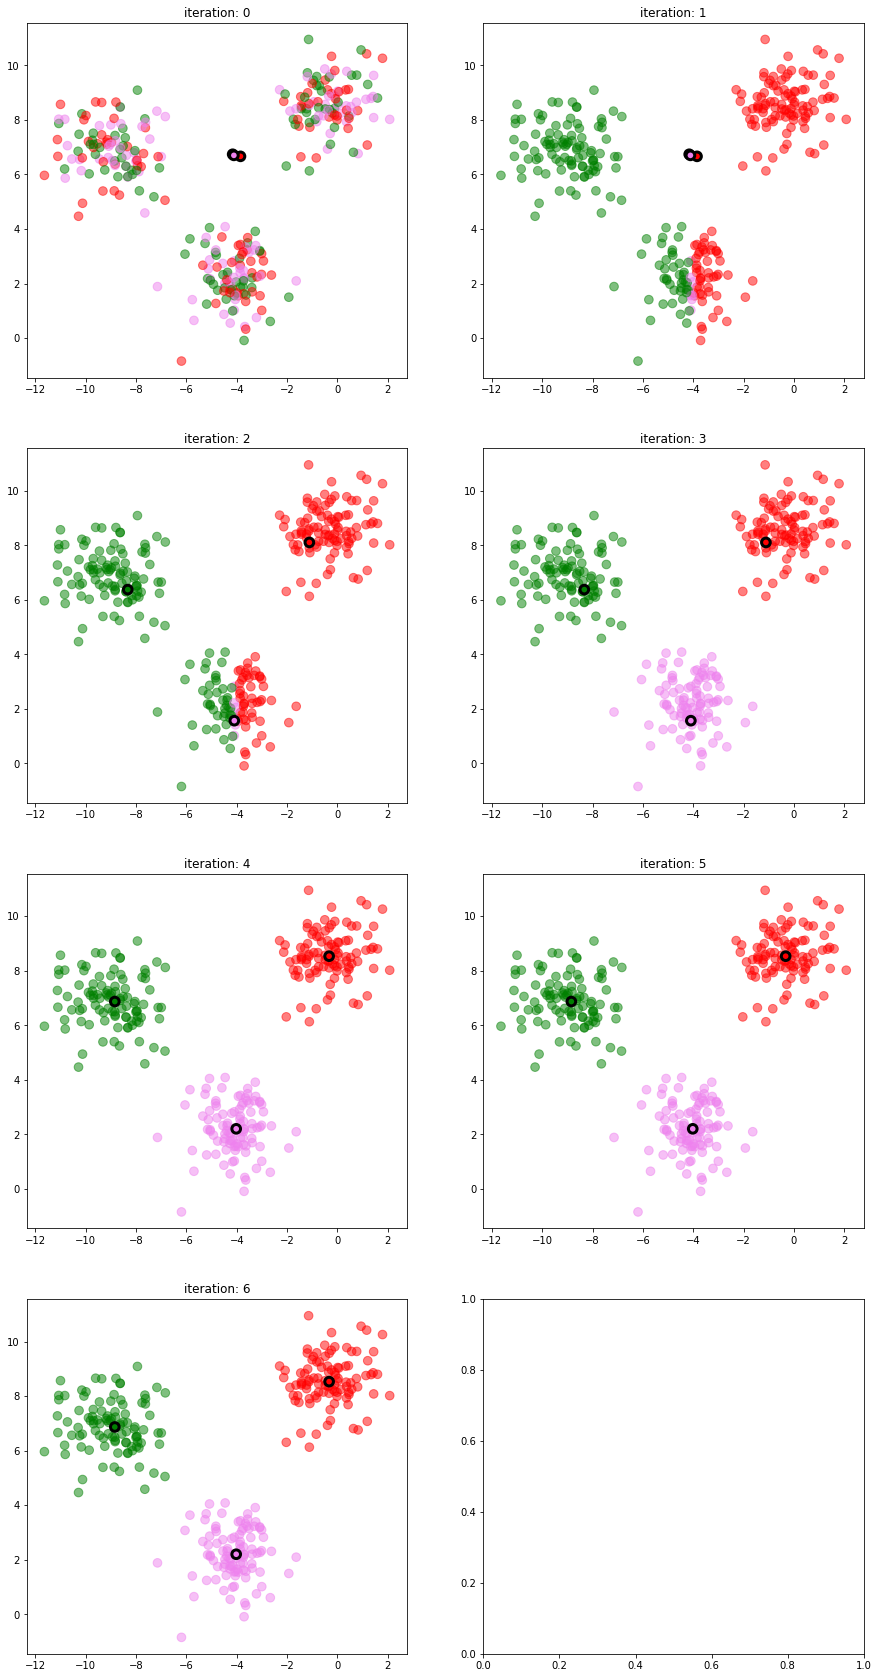

In [46]:

grouped = df_1NORM_MERGE.groupby('iteration')
centroids = df_1NORM_CENTROIDS.groupby('iteration')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,30))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    df = grouped.get_group(key)
    df_cent = centroids.get_group(key)
    ax.set_title("iteration: "+str(key))
    ax.scatter(x =df['0'],y = df['1'],c = df.color.values, s=marker_size,alpha=marker_alpha)
    ax.scatter(x = df_cent.x_1, y = df_cent.x_2, c = df_cent.color.values,s=marker_size,edgecolor='black',linewidths=3)


plt.show()

# INF - NORM


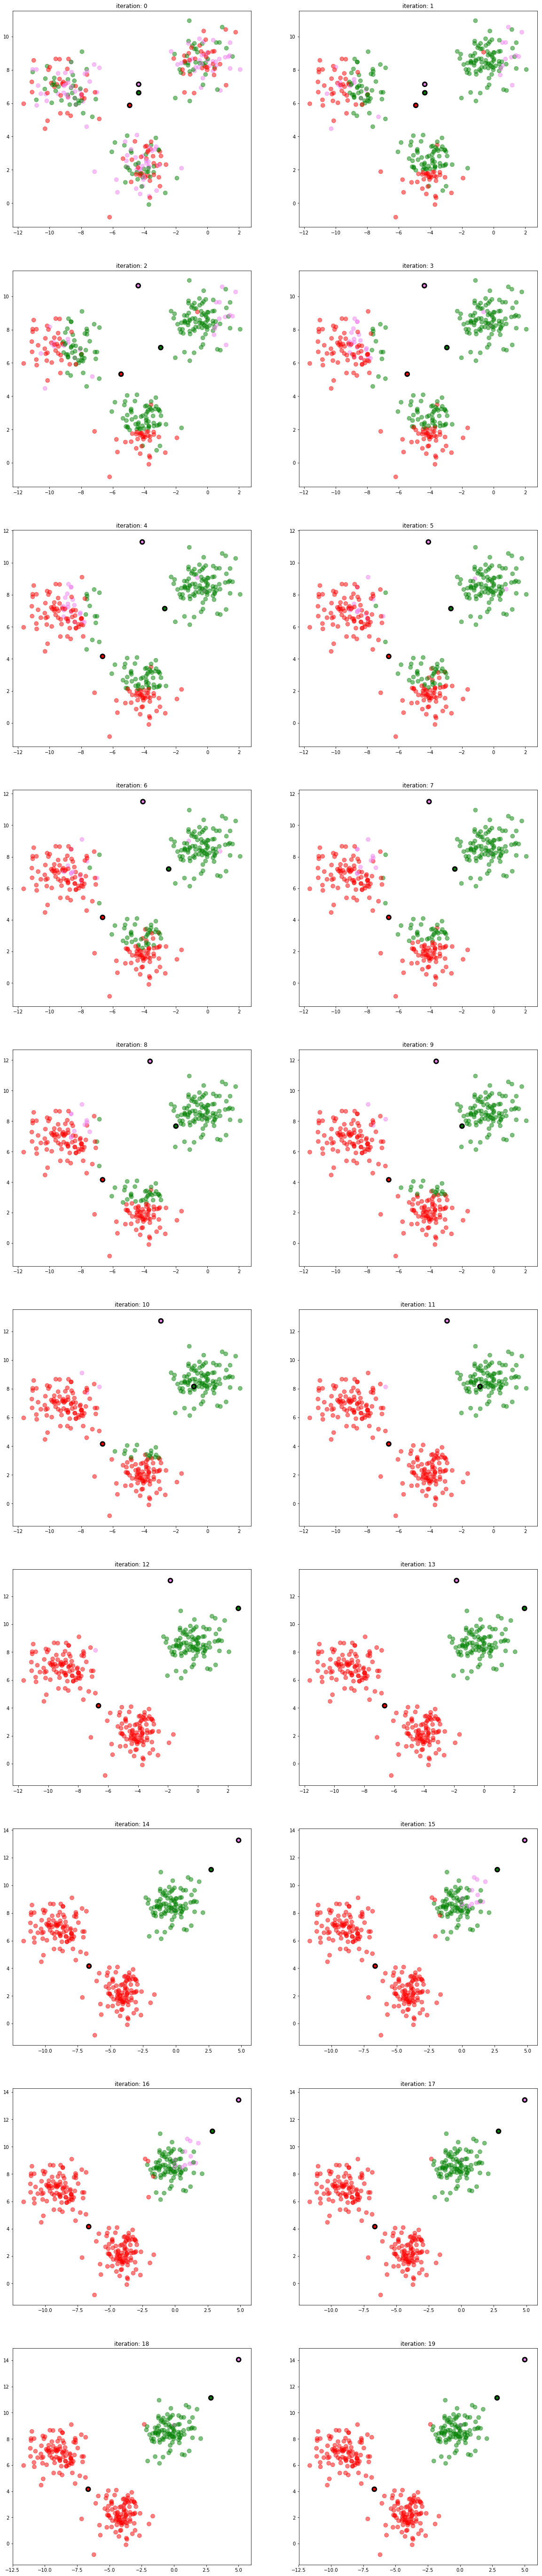

In [47]:
grouped = df_INF_NORM_MERGE.groupby('iteration')
centroids = df_INF_CENTROIDS.groupby('iteration')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols,10*nrows))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    df = grouped.get_group(key)
    df_cent = centroids.get_group(key)
    ax.set_title("iteration: "+str(key))
    ax.scatter(x =df['0'],y = df['1'],c = df.color.values, s=marker_size, alpha=marker_alpha)
    ax.scatter(x = df_cent.x_1, y = df_cent.x_2, c = df_cent.color.values, s=marker_size,edgecolor='black',linewidths=3)


plt.show()

In [48]:
df_ = df_INF_NORM_MERGE[df_INF_NORM_MERGE['iteration']==14]
df_[df_['C_j']==3]

,0,1,Index,iteration,P_i,C_j,color
14,-0.197217,8.255923,1,14,1,3,violet


In [49]:
df_INF_CENTROIDS[df_INF_CENTROIDS['iteration']==14].head()

,iteration,index,x_1,x_2,color
42,14,1,2.703762,11.132535,green
43,14,2,-6.639458,4.155648,red
44,14,3,4.803654,13.256794,violet
